<a href="https://colab.research.google.com/github/KSG722/class2022Spring/blob/main/0516%ED%95%84%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Computer Vision

**image Classfication**


In [ ]:
!pip install transformers

from transformers import ViTFeatureExtractor, ViTForImageClassification
from PIL import Image
import requests

url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
image = Image.open(requests.get(url, stream=True).raw)

feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits
# model predicts one of the 1000 ImageNet classes
predicted_class_idx = logits.argmax(-1).item()

print("Predicted class:", model.config.id2label[predicted_class_idx])

huggingface에서 
vit-base-patch16-224에서 how to use 긁어온 것 (https://huggingface.co/google/vit-base-patch16-224)

그냥 실행 시 transformers 모듈이 없기 때문. 따라서 첫 줄에 !pip install transformers추가


url의 이미지를 행렬화하며 이미지를 분석해 무엇인지(어떤 종인지) 평가하는 것.

In [ ]:
print("Predicted class:", model.config.id2label[predicted_class_idx])

Predicted class: Egyptian cat


이집트 고양이라고 분류를 함. image classification.

참고로 image callsification은 특정한 몇몇개의 분류만을 가지고 있을 뿐이며, 제공된 사진이 몇몇 분류 중에서 이집트 고양이에 가장 가까웠던 것. 참고로 https://huggingface.co/google/vit-base-patch16-224를 참고하면 1000개의 분류가 있으며 그 중 가장 확률이 높은 것이 이집션 고양이인 것. 93.7%의 일치율을 보임. 해당 페이지 오른쪽에 API 칸에 사진을 drag&drop하면 나옴.
(참고로 이집션 캣, 호랑이, 강아지 등 모든 확률값을 더하면 1)

**class segmetation** : 이미지에서 누끼따기

In [ ]:
!pip install transformers
!pip install timm

from transformers import DetrFeatureExtractor, DetrForSegmentation
from PIL import Image
import requests

url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
image = Image.open(requests.get(url, stream=True).raw)

feature_extractor = DetrFeatureExtractor.from_pretrained('facebook/detr-resnet-50-panoptic')
model = DetrForSegmentation.from_pretrained('facebook/detr-resnet-50-panoptic')

inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model(**inputs)
# model predicts COCO classes, bounding boxes, and masks
logits = outputs.logits
bboxes = outputs.pred_boxes
masks = outputs.pred_masks

https://huggingface.co/facebook/detr-resnet-50-panoptic에 들어가서 고양이 사진을 넣어보면 고양이와 뒷 배경이 완벽하게 분리되어 인식 가능.

또한 각각의 segmentation에 대해 확률값도 제공. 

분리된 것이 person인지 playingfield인지 sports ball인지도 분리하여 image classfication도 해주는 것.


**image to image** : 이미지가 들어가서 약간 변형돼서 나오는 것. 예를 들어서 어두운 배경의 사진을 넣으면 밝기가 밝아진 이미지가 나온다던가.

**unconditional image generation** : 조건없이 그림 생성.

이미지를 넣어주면 거의 새로운 그림 만들기 ai가 그림그리는 거. 엄청나게 많은 그림들을 학습시켜서 조건없이 새로운 그림을 만들게끔 하는 것. 
conditional이었으면 사과를 그려라, 바다를 그려라 이런 식이었겠지만 unconditional이므로 아무거나 그리는 것.

**object detection** : 오브젝트에 해당되는 것들을 사진에서 찾는 것. 예컨데 축구 장 위의 축구선수들이 나와있는 사진의 경우, 메시와 음바페만 오브젝트로 설정하여 찾아내는 것. 그 외 잔디밭은 인식x.

-> class segmentation은 음바페와 메시의 outline을 정확하게 따는(누끼따는) 명령어였다면

object detection은 해당 오브젝트를 전부 포괄하는 직사각형으로 범위를 따는 것.

그리고 playingfield는 segmentation과 달리 여기에선 인식x. object가 아니기 때문.





#자연어 처리(Natural Language Processing)

**translation** : 파파고

**Fill-Mask** : ai더러 빈칸 주고 찾기. 

ex) The Paris is [MASK] of France라고 입력하면 컴퓨터가 capital이라는 단어를 준다.

**Token classification** : My name is Sarah and I live in London이라고 입력하면 

Sarah -> Person

London -> Loc(location) 이라고 인식. 이 밖에도 Organization 등도 인식.

**Sentence Similarity** : 문장 일치율 검사.

Source Sentence에 That is a happy person 넣고 

sentence to compare to에 다른 문장들 여러개 넣으면 그 중 어느 문장이 어느 정도 일치율로 유사한지 보여줌.

**Question answering** : 질문과 문맥을 던져주면, answer를 도출하는 모델.
ex) My name is Kim.(문맥) What is my name?(질문) -> Kim

**summarization** : paragraph를 요약해주는 모델

**zero-shot classification**(중요) : 기존 classification 과정은 (정해진)여러 가지의 class로 구성된 데이터 속에서 훈련을 시키고, 이후 빵 그림이 들어가면 그 데이터들 속에서 이 그림이 빵이라는 분류를 찾아내는 것. 

그러나 제로샷은 어떤 문장을 주고, possible class name(키워드)도 줌. 미리 훈련을 한 적이 없는 데이터들. 문장 중 어떤 키워드가 문장을 설명하는 것과 맞는가를 보는 것. 문장: I have a problem with my iPhone that needs to be ~~(못봄) ASAP!. 그리고 키워드에 urgent, happy 등의 키워드를 넣으면 이 중 가장 연관성이 높은 키워드인 urgent가 도출되는 것

**text classification** : 영화리뷰 한 줄 넣으면 이게 negtive한 리뷰인지 positive한 리뷰인지 구분하는 것. 


**text2text generation** : answer가 주어져 있을 때 question text를 생성

**text geneartion** : 일부 text를 주면 전체 문장을 생성

**conversation** : 채팅처럼 서로 주고받으면서 text를 생성. 챗봇.



In [ ]:
from transformers import Wav2Vec2Processor, Wav2Vec2ForCTC
 from datasets import load_dataset
 import soundfile as sf
 import torch
 
 # load model and tokenizer
 processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
 model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")
     
 # load dummy dataset and read soundfiles
 ds = load_dataset("patrickvonplaten/librispeech_asr_dummy", "clean", split="validation")
 
 # tokenize
 input_values = processor(ds[0]["audio"]["array"], return_tensors="pt", padding="longest").input_values  # Batch size 1
 
 # retrieve logits
 logits = model(input_values).logits
 
 # take argmax and decode
 predicted_ids = torch.argmax(logits, dim=-1)

https://huggingface.co/facebook/wav2vec2-base-960h

#Audio

**Automatic speech recognition** : 음성인식. 오디오 파일을 넣으면 해당 오디오를 인식해서 텍스트로 도출해줌. 혹은 실시간으로 말하면 이를 인식하기도 함. 

**audio classfication** : 언어 분류 혹은 어조 분석 등. 
ex) 한국어, 일본어, 영어 등등 중 무슨 언어인 지 확률로 알려줌. 
ex)오디오 파일을 넣으면 어조를 분석해서 분류해줌. -> 화난 음성, 슬픈 상태 등.

**text-to-speech** : 텍스트 넣으면 ai가 읽어줌. 

만들어진 행렬 set(ai model)을 가지고 사용해서 입력해서 넣어서 출력을 넣어서 뭐가 나오는지 보는 것을 ***inference***라고 함(시험!!)


**audio-to-audio** : 오디오를 넣어주면 잡음을 제거하고 더 선명한 오디오 도출

**Voice Activity Detection**(중요) : 오디오 wave에서 사람 목소리 구간 찾기. 사람의 speech와 관련된 구간 찾기. 예를 들어 '쯧쯧쯧'이라는 소리를 냈어도 이는 사람의 voice라든지, speech라고 보기 힘듦. 이런 것까지 걸러줌..

혹은 여러 소리가 겹쳐있을 때 소리를 구분해줌. ->
ex) 회의 과정. 여러 사람의 소리가 겹쳐있음. 이 때 회의록을 추출하기 위한 모델. 여러 사람의 목소리를 구분해서 찾아줌. 말하는 사람이 female인지 male인지 구분하고, 누가 어떤 구간에서 speech를 했는지 구간을 찾아줌.
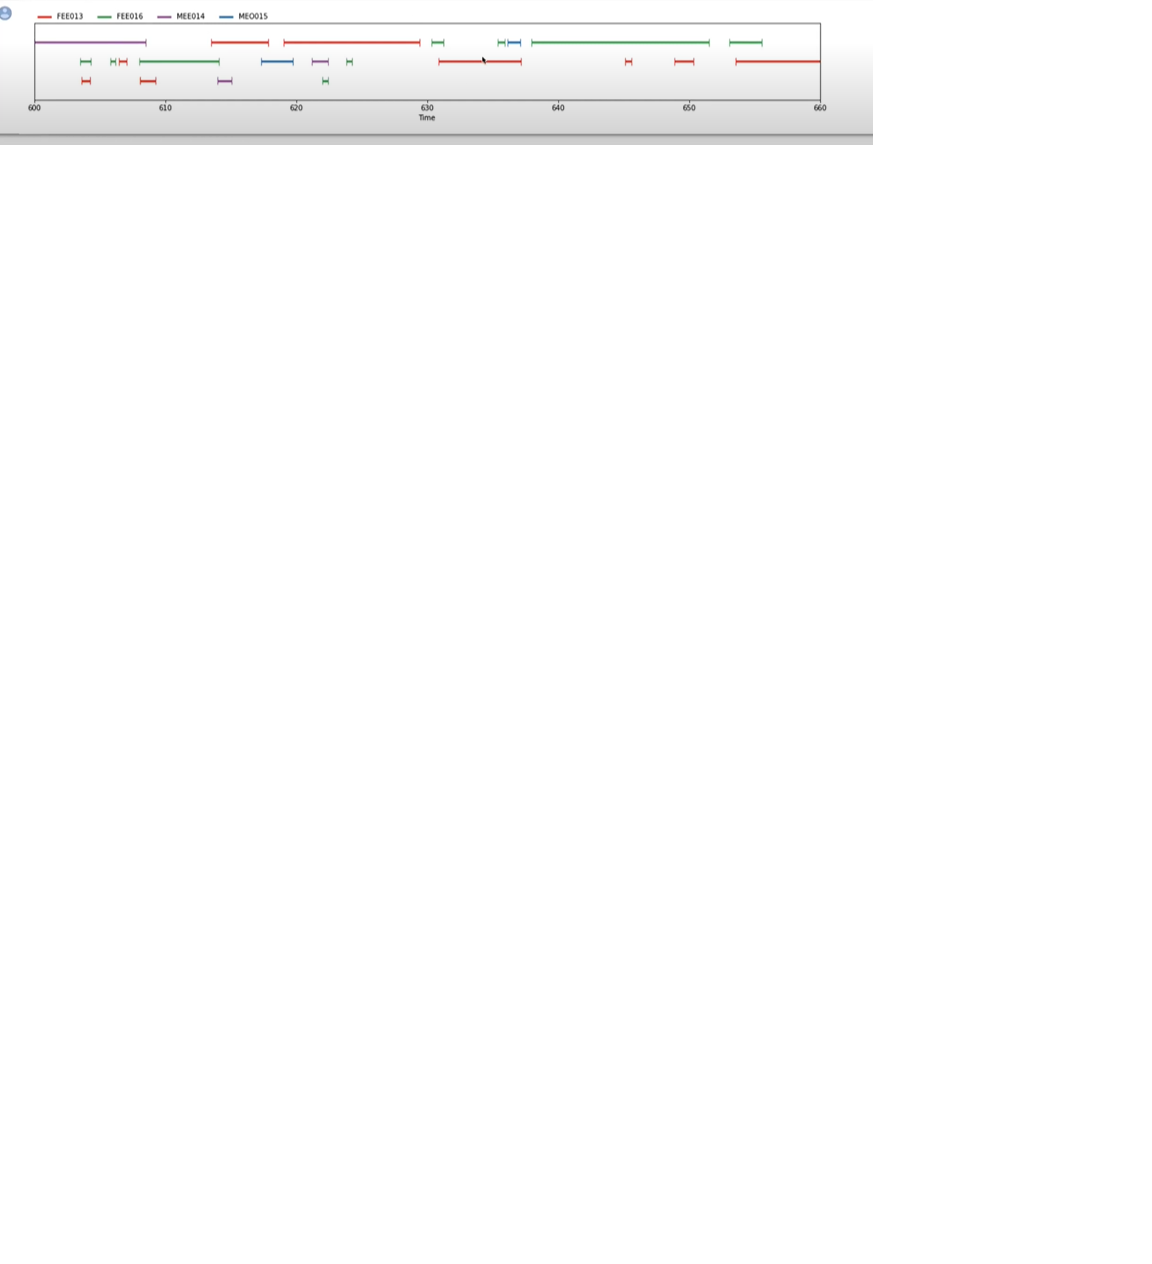

그리고 이렇게 ai가 구분한 구간이랑 실제로 구분한 pyannote 구간을 비교해서 정확성을 계산할 수도 있음.

pyannote.metrics.diarization 함수를 통해 계산한 결과

error rate = 27.2% <- 즉 약 73%의 정확도를 보인 ai model

#pyannote
 
**speaker-diarization** : 화자 여러 명을 모두 찾아서 구분.
**voice-activity-detection** : 잡음과 무음 구간과 사람의 voice 구간을 구분
**speaker-segmentation** : 화자의 구분
**overlapped-speech-detection** : 화자 간 스피킹이 겹치는 부분


#Multimodal (여러 modal을 왔다갔다 한다는 것)

**Text-to-Imgae** : AI화가. 어떤 텍스트를 주면(해변의 강아지) ai가 진짜 바닷가의 강아지 그림을 그리는 명령어.

ex) a blue dancing peanut이라는 텍스트를 집어넣으면 춤추는 파란색 땅콩 캐릭터 그림이 나온다.


**image to text** : TTI랑 반대. image captioning(이미지 자막달기). 이미지를 주면 그 걸 텍스트로 설명해내는 명령어









이러한 허깅페이스 그라디오를 콜랩에서 구현하는 것도 중요하다.

